In [1]:
# 通过pandas 进行读取数据
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('./train.csv')
print(df.shape)
df.head()

(22500, 22)


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no


In [2]:
# info查看详细信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22500 non-null  int64  
 1   age               22500 non-null  int64  
 2   job               22500 non-null  object 
 3   marital           22500 non-null  object 
 4   education         22500 non-null  object 
 5   default           22500 non-null  object 
 6   housing           22500 non-null  object 
 7   loan              22500 non-null  object 
 8   contact           22500 non-null  object 
 9   month             22500 non-null  object 
 10  day_of_week       22500 non-null  object 
 11  duration          22500 non-null  int64  
 12  campaign          22500 non-null  int64  
 13  pdays             22500 non-null  int64  
 14  previous          22500 non-null  int64  
 15  poutcome          22500 non-null  object 
 16  emp_var_rate      22500 non-null  float6

In [4]:
# 是否有缺失值
df.isna().sum()

id                  0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_index    0
cons_conf_index     0
lending_rate3m      0
nr_employed         0
subscribe           0
dtype: int64

<Axes: xlabel='subscribe', ylabel='count'>

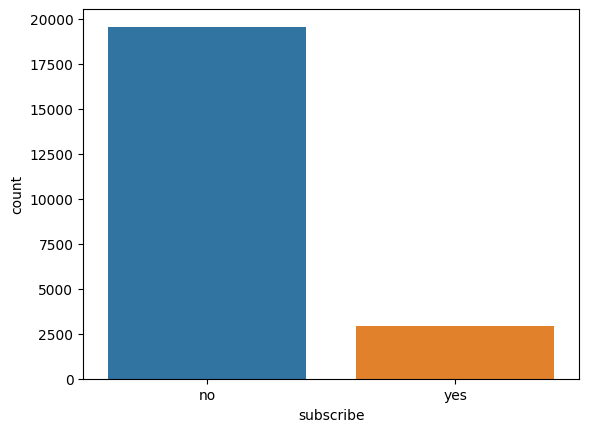

In [5]:
sns.countplot(x = df['subscribe'])
#数据分布不平衡的，可以使用上采样解决样本不均衡问题

In [6]:
df.head(1)

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no


In [7]:
# 进行编码
from sklearn.preprocessing import LabelEncoder
col_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week'
           ,'poutcome','subscribe']

for col in col_list:
    df[col] = LabelEncoder().fit_transform(df[col])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import MinMaxScaler

data = df.drop(['id','subscribe'],axis = 1)
label = df['subscribe']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape)

(15750, 20) (6750, 20)


In [10]:
# 构建ANN 网络
import tensorflow as tf

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 编译模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# 训练模型
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

# 进行预测
predictions = model.predict(X_test)

Epoch 1/20
124/124 [==============================] - 2s 4ms/step - loss: 0.3970 - accuracy: 0.8552 - val_loss: 0.3453 - val_accuracy: 0.8681
Epoch 2/20
124/124 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8700 - val_loss: 0.3340 - val_accuracy: 0.8683
Epoch 3/20
124/124 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8702 - val_loss: 0.3348 - val_accuracy: 0.8673
Epoch 4/20
124/124 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8702 - val_loss: 0.3285 - val_accuracy: 0.8679
Epoch 5/20
124/124 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8722 - val_loss: 0.3255 - val_accuracy: 0.8668
Epoch 6/20
124/124 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.8747 - val_loss: 0.3156 - val_accuracy: 0.8667
Epoch 7/20
124/124 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8763 - val_loss: 0.3016 - val_accuracy: 0.8711
Epoch 

In [11]:
# 将概率值转换为类别标签
predicted_labels = (predictions > 0.5).astype(int)

# 生成分类报告
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# 计算AUC
auc_score = roc_auc_score(y_test, predictions)
print("AUC Score:", auc_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5860
           1       0.54      0.22      0.32       890

    accuracy                           0.87      6750
   macro avg       0.72      0.60      0.62      6750
weighted avg       0.85      0.87      0.85      6750

AUC Score: 0.8503587452544387


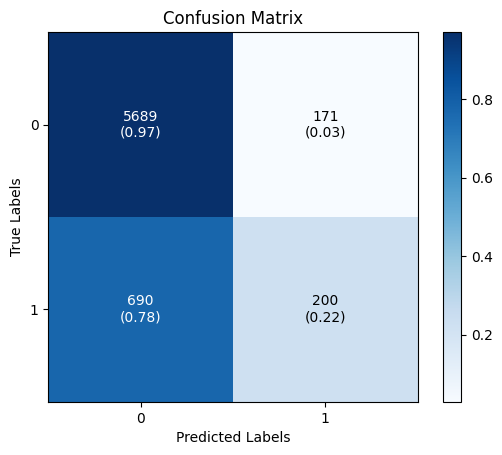

In [12]:
from mlxtend.plotting import plot_confusion_matrix

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, predicted_labels)

# 绘制混淆矩阵
plot_confusion_matrix(conf_matrix, show_normed=True,colorbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

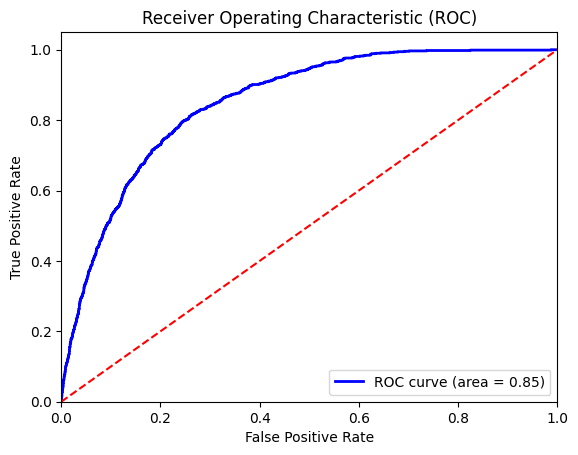

In [13]:
# 绘制ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()